In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
gs_df = pd.read_csv('../../data/master/master_csv/gt_master_table.csv')

In [100]:
gs_df.head()

,Race_ID,Race_Date,Race_Name,Actual_Dist,Gender,Ticket_Position,Name,Nationality,Age_Category,Gender_Rank,...,WS_Finisher_Flag,WS_DNF_Flag,WS_DNS_Flag,GT_Finish_Time,GT_Pace,WS_Finish_Time,WS_Pace,WS_Gender_Rank,Num_WS_Finish,Days_to_WS
0,91882,4/2/2016,Gorge Waterfalls 100K,64.57,F,2,amanda basham,USA,20-34,2,...,True,False,False,0.440394,9:49,0.841424,12:07,4.0,0.0,84.0
1,33769,2/6/2016,Sean O'Brien 100K,62.00,F,2,amelia boone,USA,20-34,2,...,False,False,True,0.445961,10:21,NaN,NaN,NaN,0.0,140.0
2,34087,2/13/2016,Black Canyon,62.93,F,1,amy sproston,USA,40-44,1,...,True,False,False,0.423310,9:41,0.788009,11:21,2.0,3.0,133.0
3,34211,3/19/2016,Georgia Death Race,74.38,M,1,andrew miller,USA,20-34,1,...,True,False,False,0.488090,9:26,0.652500,9:24,1.0,0.0,98.0
4,27160,4/9/2016,Lake Sonoma 50M,50.49,F,2,anna mae flynn,USA,20-34,3,...,False,True,False,0.311366,8:52,NaN,NaN,NaN,0.0,77.0


In [101]:
# Filter out WS_Year 2026
gs_df = gs_df[gs_df['WS_Year'] != 2026]

In [102]:
# Count
finisher_count = gs_df['WS_Finisher_Flag'].sum()
dnf_count = gs_df['WS_DNF_Flag'].sum()
dns_count = gs_df['WS_DNS_Flag'].sum()
total_finisher_dnf_count = finisher_count + dnf_count
total_count = len(gs_df)

print(f'Total Overall Finishers: {finisher_count}')
print(f'Total Overall DNF: {dnf_count}')
print(f'Total Overall DNS: {dns_count}')
print(f'Total Finisher/DNF Count: {total_finisher_dnf_count}')
print(f'Total Overall: {total_count}')

Total Overall Finishers: 162
Total Overall DNF: 32
Total Overall DNS: 18
Total Finisher/DNF Count: 194
Total Overall: 212


In [103]:
# Rate
finisher_rate = round(finisher_count / total_finisher_dnf_count * 100, 1)
dnf_rate = round(dnf_count / total_finisher_dnf_count * 100, 1)
dns_rate = round(dns_count / total_count * 100, 1)

print(f'Finisher Rate: {finisher_rate}')
print(f'DNF Rate: {dnf_rate}')
print(f'DNS Rate: {dns_rate}')

Finisher Rate: 83.5
DNF Rate: 16.5
DNS Rate: 8.5


In [104]:

gender_stats = gs_df.groupby('Gender').agg(
    Finisher_Count=('WS_Finisher_Flag', 'sum'),
    DNF_Count=('WS_DNF_Flag', 'sum'),
    DNS_Count=('WS_DNS_Flag', 'sum'),
    Total=('Gender', 'count')
)

# Calculate starters (exclude DNS)
gender_stats['Starters'] = gender_stats['Total'] - gender_stats['DNS_Count']

# Rates using starters for finisher and DNF
gender_stats['Finisher_Rate'] = gender_stats['Finisher_Count'] / gender_stats['Starters'] * 100
gender_stats['DNF_Rate'] = gender_stats['DNF_Count'] / gender_stats['Starters'] * 100

# DNS rate still uses total
gender_stats['DNS_Rate'] = gender_stats['DNS_Count'] / gender_stats['Total'] * 100

gender_stats


,Finisher_Count,DNF_Count,DNS_Count,Total,Starters,Finisher_Rate,DNF_Rate,DNS_Rate
Gender,,,,,,,,
F,80,16,11,107,96,83.333333,16.666667,10.280374
M,82,16,7,105,98,83.673469,16.326531,6.666667


In [105]:


# Group by Year and aggregate counts
year_stats = gs_df.groupby('WS_Year').agg(
    Finisher_Count=('WS_Finisher_Flag', 'sum'),
    DNF_Count=('WS_DNF_Flag', 'sum'),
    DNS_Count=('WS_DNS_Flag', 'sum'),
    Total=('WS_Year', 'count')
).reset_index()

# Ensure numeric types
year_stats[['Finisher_Count', 'DNF_Count', 'DNS_Count', 'Total']] = (
    year_stats[['Finisher_Count', 'DNF_Count', 'DNS_Count', 'Total']].apply(pd.to_numeric, errors='coerce')
)

# Calculate starters (exclude DNS)
year_stats['Starters'] = year_stats['Total'] - year_stats['DNS_Count']

# Compute rates using Pandas .round()
year_stats['Finisher_Rate'] = (year_stats['Finisher_Count'] / year_stats['Starters'] * 100).round(1)
year_stats['DNF_Rate'] = (year_stats['DNF_Count'] / year_stats['Starters'] * 100).round(1)
year_stats['DNS_Rate'] = (year_stats['DNS_Count'] / year_stats['Total'] * 100).round(1)

year_stats

,WS_Year,Finisher_Count,DNF_Count,DNS_Count,Total,Starters,Finisher_Rate,DNF_Rate,DNS_Rate
0,2016,15,5,4,24,20,75.0,25.0,16.7
1,2017,16,4,0,20,20,80.0,20.0,0.0
2,2018,15,1,0,16,16,93.8,6.2,0.0
3,2019,14,4,0,18,18,77.8,22.2,0.0
4,2021,11,5,4,20,16,68.8,31.2,20.0
5,2022,20,1,5,26,21,95.2,4.8,19.2
6,2023,24,3,1,28,27,88.9,11.1,3.6
7,2024,26,3,1,30,29,89.7,10.3,3.3
8,2025,21,6,3,30,27,77.8,22.2,10.0


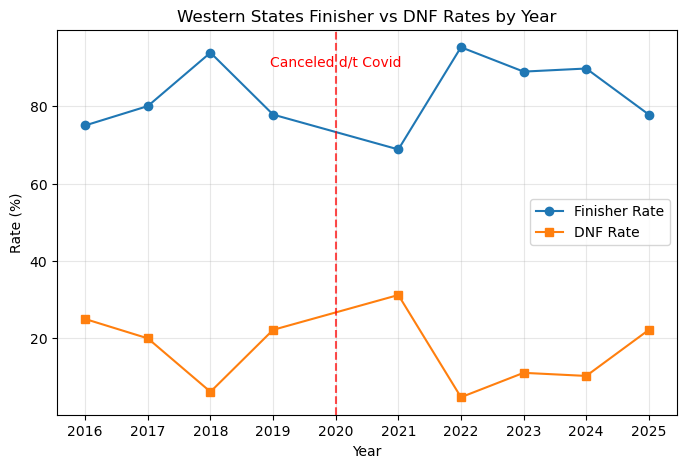

In [109]:
# Plot GT Recipient WS Finish/DNF Rate
plt.figure(figsize=(8, 5))
plt.plot(year_stats['WS_Year'], year_stats['Finisher_Rate'], marker='o', label='Finisher Rate')
plt.plot(year_stats['WS_Year'], year_stats['DNF_Rate'], marker='s', label='DNF Rate')

# Highlight pandemic year
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.text(2020, max(year_stats['Finisher_Rate']) * 0.95, 'Canceled d/t Covid', color='red', ha='center')

plt.title('Western States Finisher vs DNF Rates by Year')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(year_stats['WS_Year'].tolist() + [2020])  # Add 2020 to x-axis ticks
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [71]:
gs_df['WS_Finish_Hours'] = gs_df['WS_Finish_Time']*24


trend_df = gs_df.groupby('WS_Year').agg(
    Avg_Finish_Time=('WS_Finish_Hours', 'mean'),
    Avg_Gender_Rank=('WS_Gender_Rank', 'mean')
).reset_index()


finish_time_trend = "Improving" if trend_df['Avg_Finish_Time'].iloc[-1] < trend_df['Avg_Finish_Time'].iloc[0] else "Worsening"
gender_rank_trend = "Improving" if trend_df['Avg_Gender_Rank'].iloc[-1] < trend_df['Avg_Gender_Rank'].iloc[0] else "Worsening"


In [72]:
print("Overall Statistics:")
print(f"Total Records: {total_count}")
print(f"Finishers: {finisher_count} ({finisher_rate:.2f}%)")
print(f"DNF: {dnf_count} ({dnf_rate:.2f}%)")
print(f"DNS: {dns_count} ({dns_rate:.2f}%)\n")

print("Statistics by Gender:")
print(gender_stats)

print("\nYear-over-Year Trends:")
print(trend_df)
print(f"Finish Time Trend: {finish_time_trend}")
print(f"Gender Rank Trend: {gender_rank_trend}")

Overall Statistics:
Total Records: 212
Finishers: 162 (83.50%)
DNF: 32 (16.50%)
DNS: 18 (8.50%)

Statistics by Gender:
       Finisher_Count DNF_Count DNS_Count  Total Starters Finisher_Rate  \
Gender                                                                    
F                  80        16        11    107       96     83.333333   
M                  82        16         7    105       98     83.673469   

         DNF_Rate   DNS_Rate  
Gender                        
F       16.666667  10.280374  
M       16.326531   6.666667  

Year-over-Year Trends:
   WS_Year  Avg_Finish_Time  Avg_Gender_Rank
0     2016        19.025241        10.333333
1     2017        21.432656        19.875000
2     2018        20.362111        22.133333
3     2019        18.615337        10.857143
4     2021        19.439318         8.818182
5     2022        19.325847        12.750000
6     2023        17.564502        10.458333
7     2024        17.226015        11.923077
8     2025        17.468889

In [73]:
gender_trend_df = gs_df.groupby(['WS_Year', 'Gender']).agg(
    Avg_Finish_Time=('WS_Finish_Hours', 'mean'),
    Avg_Gender_Rank=('WS_Gender_Rank', 'mean'),
    Count=('Gender', 'size')
).reset_index()

trend_summary = {}
for gender in gender_trend_df['Gender'].unique():
    gender_data = gender_trend_df[gender_trend_df['Gender'] == gender].sort_values('WS_Year')
    finish_trend = "Improving" if gender_data['Avg_Finish_Time'].iloc[-1] < gender_data['Avg_Finish_Time'].iloc[0] else "Worsening"
    rank_trend = "Improving" if gender_data['Avg_Gender_Rank'].iloc[-1] < gender_data['Avg_Gender_Rank'].iloc[0] else "Worsening"
    trend_summary[gender] = {
        'Finish_Time_Trend': finish_trend,
        'Gender_Rank_Trend': rank_trend
    }

print("Year-over-Year Trends by Gender:")
print(gender_trend_df)
print("\nTrend Summary:")
for gender, trends in trend_summary.items():
    print(f"{gender}: Finish Time - {trends['Finish_Time_Trend']}, Gender Rank - {trends['Gender_Rank_Trend']}")

Year-over-Year Trends by Gender:
    WS_Year Gender  Avg_Finish_Time  Avg_Gender_Rank  Count
0      2016      F        20.424524         6.571429     12
1      2016      M        17.800868        13.625000     12
2      2017      F        22.131701        11.625000     11
3      2017      M        20.733611        28.125000      9
4      2018      F        20.726319        11.750000      8
5      2018      M        19.945873        34.000000      8
6      2019      F        20.537882        11.875000      9
7      2019      M        16.051944         9.500000      9
8      2021      F        20.815648        10.833333     10
9      2021      M        17.787722         6.400000     10
10     2022      F        20.689343        12.818182     13
11     2022      M        17.659352        12.666667     13
12     2023      F        19.141338        10.363636     14
13     2023      M        16.230256        10.538462     14
14     2024      F        18.841010        12.727273     15
15     

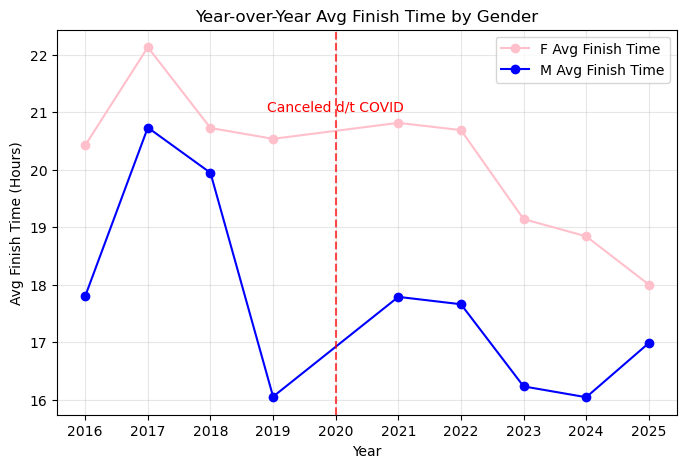

In [118]:
# Plot Avg_Finish_Time trends by gender with custom colors
plt.figure(figsize=(8, 5))
colors = {'M': 'blue', 'F': 'pink'}

for gender in gender_trend_df['Gender'].unique():
    gender_data = gender_trend_df[gender_trend_df['Gender'] == gender].sort_values('WS_Year')
    plt.plot(gender_data['WS_Year'], gender_data['Avg_Finish_Time'], marker='o', color=colors[gender], label=f'{gender} Avg Finish Time')


# Add reference line for 2020 pandemic year
plt.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
plt.text(2020, max(gender_trend_df['Avg_Finish_Time']) * 0.95, 'Canceled d/t COVID', color='red', ha='center', fontsize=10, rotation=0)

plt.title('Year-over-Year Avg Finish Time by Gender')
plt.xlabel('Year')
plt.ylabel('Avg Finish Time (Hours)')
plt.xticks(sorted(gender_trend_df['WS_Year'].unique()))

# Add 2020 to x-axis ticks
plt.xticks(sorted(gender_trend_df['WS_Year'].unique()) + [2020])

plt.legend()
plt.grid(alpha=0.3)

In [63]:
gender_trend_df

,WS_Year,Gender,Avg_Finish_Time,Avg_Gender_Rank,Count
0,2016,F,20.424524,6.571429,12
1,2016,M,17.800868,13.625000,12
2,2017,F,22.131701,11.625000,11
3,2017,M,20.733611,28.125000,9
4,2018,F,20.726319,11.750000,8
5,2018,M,19.945873,34.000000,8
6,2019,F,20.537882,11.875000,9
7,2019,M,16.051944,9.500000,9
8,2021,F,20.815648,10.833333,10
9,2021,M,17.787722,6.400000,10


In [122]:
df = pd.read_csv('../../data/master/master_csv/gt_master_table.csv')

KeyError: 'Race_Style'

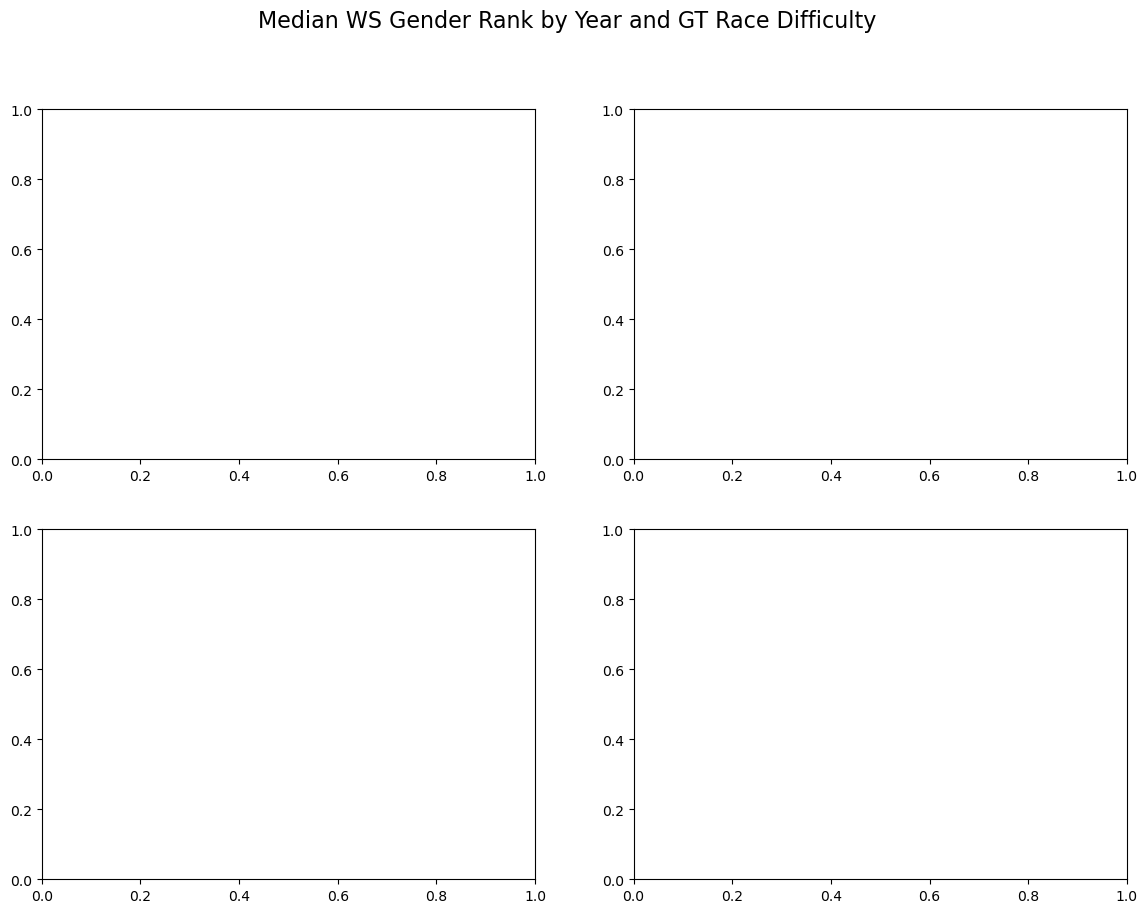

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Median WS Gender Rank by Year and GT Race Difficulty', fontsize=16)

difficulty_colors = {
    'easy': 'tab:blue',
    'moderate': 'tab:green', 
    'hard': 'tab:orange',
    'extreme': 'tab:red'
}

categories = ['easy', 'moderate', 'hard', 'extreme']
titles = ['EASY Difficulty', 'MODERATE Difficulty', 'HARD Difficulty', 'EXTREME Difficulty']

for idx, (cat, title) in enumerate(zip(categories, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Filter data for this category
    cat_data = df[df['Race_Style'] == cat].copy()
    
    # Calculate median rank by year and gender
    for gender in ['M', 'F']:
        gender_data = cat_data[cat_data['Gender'] == gender]
        yearly_median = gender_data.groupby('WS_Year')['WS_Gender_Rank'].median()
        
        color = 'blue' if gender == 'M' else 'pink'
        ax.plot(yearly_median.index, yearly_median.values, 
               marker='o', linewidth=2, label=gender, color=color, markersize=8)
    
    # Calculate n for this category
    n_total = len(cat_data)
    n_male = len(cat_data[cat_data['Gender'] == 'M'])
    n_female = len(cat_data[cat_data['Gender'] == 'F'])
    
    ax.set_title(f'{title}\n(M: n={n_male}, F: n={n_female})', 
                fontsize=12, fontweight='bold', color=difficulty_colors[cat])
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Median WS Gender Rank', fontsize=10)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 30)
    ax.axvline(2020, linestyle='--', color='gray', alpha=0.5)  # Canceled year

plt.tight_layout()
plt.show()